In [126]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

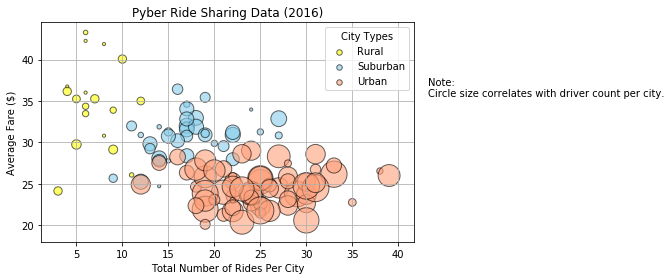

In [127]:
## Obtain the x and y coordinates for each of the three city types

# group data based on type
type_group = merge_data.groupby("type")

# fn to calculate avg fare & trip count for each city in a given group (rural, urban, sub)
def getCityTypeData(cityType):
    #get only the rows for the input cityType
    input_group = type_group.get_group(cityType)
    #group by city
    city_group = input_group.groupby("city")
    #[number of rides series, avg fare series, driver count series]
    return [city_group["fare"].count(), city_group["fare"].mean(), 
            city_group["driver_count"].first()]

# call above fn to obtain data for each type
rural_data = getCityTypeData("Rural")
suburban_data = getCityTypeData("Suburban")
urban_data = getCityTypeData("Urban")


## Build the scatter plots for each city types

# store data of each type in one list
data = (rural_data, suburban_data, urban_data)

# color and label lists correspond to data list
colors = ("yellow", "skyblue", "lightsalmon")
groups = ("Rural", "Suburban", "Urban")

# zip all 3 lists together and loop through zipped list to plot pt for each city
for data, color, group in zip(data, colors, groups):
    #x, y, z represent number of rides, avg fares, number of drivers
    x, y, z = data
    plt.scatter(x, y, marker='o', color=color, s=z*10, label=group,
                alpha=0.6, edgecolor='black')

    
## Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.grid()


## Create a legend

lgnd = plt.legend(title="City Types")

# resize legend key sizes
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


## Incorporate a text label regarding circle size

txt = "Note: \nCircle size correlates with driver count per city."
plt.figtext(1, 0.65, txt)


## Save Figure

plt.tight_layout()
plt.savefig("Images/pyber_scatterplot.png")

## Total Fares by City Type

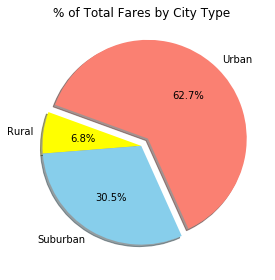

In [128]:
# Calculate Type Percents
total_fares = type_group["fare"].sum()

# Build Pie Chart
colors = ("yellow", "skyblue", "salmon")
groups = ("Rural", "Suburban", "Urban")
explode = (0, 0, 0.1)

plt.pie(total_fares, explode=explode, labels=groups, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=160)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.tight_layout()
plt.savefig("Images/fares_by_type_pie.png")

## Total Rides by City Type

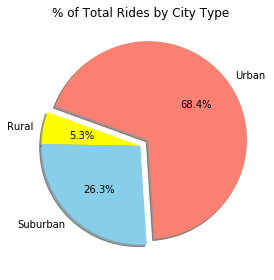

In [129]:
# Calculate Type Percents
total_fares = type_group["fare"].count()

# Build Pie Chart
colors = ("yellow", "skyblue", "salmon")
groups = ("Rural", "Suburban", "Urban")
explode = (0, 0, 0.1)

plt.pie(total_fares, explode=explode, labels=groups, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=160)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.tight_layout()
plt.savefig("Images/rides_by_type_pie.png")

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


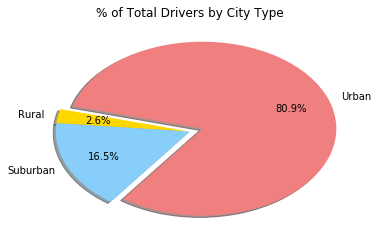

In [6]:
# Show Figure
plt.show()